### Revel Consulting | Decision Science Technical Interview | Data Science

### Instructions

Welcome, and thank you for taking the time to interview with Revel for the role of a Data Scientist! This is the Technical Screen Interview.

In this exercise you need to perform the following tasks:   
1.) Import data into structured format  
2.) Summarize the data using descriptive statistics (e,g, sum, average, etc.)  
3.) Manipulate the data including indexing, slicing and grouping  
4.) Visualize the data using a fundamental matplotlib package  
5.) Perform a regression using Random Forest
6.) Perform hyperparameter tuning
7.) Get Feature importance

First, import the packages you'll need.

In [2]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import random

### 1. Data Import and Data Summary

**(a) Load the data xyz.csv into a pandas dataframe.**

In [3]:
# Read the 'BlackFriday.csv' data into a dataframe
# Your code here
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print('unique product_ID: ', len(data['Product_ID'].unique()))
print('unique user_ID: ', len(data['User_ID'].unique()))
data.loc[data['Product_ID'] == 'P00274942', ].head()

unique product_ID:  3623
unique user_ID:  5891


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
554,1000102,P00274942,M,36-45,19,C,3,0,8,NaN,NaN,4102
732,1000139,P00274942,F,26-35,20,C,2,0,8,NaN,NaN,9746
1036,1000175,P00274942,F,26-35,2,B,1,0,8,NaN,NaN,9995
1059,1000181,P00274942,M,18-25,17,C,1,0,8,NaN,NaN,9820


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**(b) It's time to get to know your data! Report the number of rows and columns in the dataset.**

In [5]:
# Get the dimensions of the dataframe
# Your code here
data.shape

(537577, 12)

**Please type the number of rows and columns.**  
Number of rows:  537577<br>
Number of columns:  12

**(c) What variables does this dataset have? Report the variable names along with the data type of each variable.**

In [6]:
# Your code here
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### 2. Data Manipulation/ Exploratory Analyses

**(a) What are the features included in the dataset?**

In [7]:
# Your code here
feature = data.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
feature.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,NaN,NaN
3,F,0-17,10,A,2,0,12,14.0,NaN
4,M,55+,16,C,4+,0,8,NaN,NaN


**(b) Create a feature correlation heat map ?**

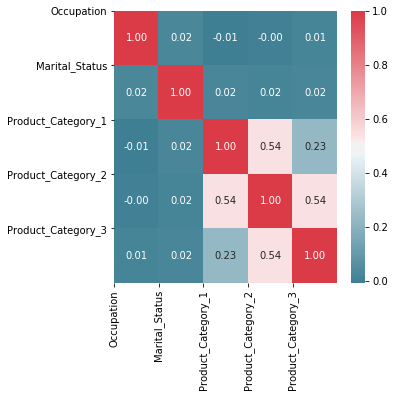

In [8]:
# Pearson Correlation of Features

corr = feature.corr()
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

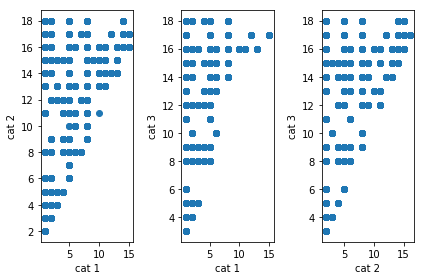

In [9]:
plt.subplot(1,3,1)
sub1 = data[['Product_Category_1', 'Product_Category_2']]
plt.scatter(x = sub1['Product_Category_1'], y= sub1['Product_Category_2'])
plt.xlabel('cat 1')
plt.ylabel('cat 2')

plt.subplot(1,3,2)
sub2 = data[['Product_Category_1', 'Product_Category_3']]
plt.scatter(x = sub2['Product_Category_1'], y= sub2['Product_Category_3'])
plt.xlabel('cat 1')
plt.ylabel('cat 3')

plt.subplot(1,3,3)
sub3 = data[['Product_Category_2', 'Product_Category_3']]
plt.scatter(x = sub3['Product_Category_2'], y= sub3['Product_Category_3'])
plt.xlabel('cat 2')
plt.ylabel('cat 3')

plt.style.use('ggplot')
plt.tight_layout()
plt.show()

In [10]:
data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].head()

,Product_Category_1,Product_Category_2,Product_Category_3
0,3,NaN,NaN
1,1,6.0,14.0
2,12,NaN,NaN
3,12,14.0,NaN
4,8,NaN,NaN


In [11]:
data.loc[data['Product_Category_1'] > 14, ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].head()

,Product_Category_1,Product_Category_2,Product_Category_3
165,15,NaN,NaN
212,16,NaN,NaN
213,16,NaN,NaN
220,16,NaN,NaN
234,16,NaN,NaN


**How do you interpret this? Please type your answer.**



Observations: <br>
-product cat 1 has no missing values. if cat 2 is NaN, cat 3 is also NaN. <br>
-product cat 1 < cat 2 < cat 3- that's why they're pearson correlated. <br>
-guessing- cat 3 describs cat 2, cat2 describs cat 1. and the higher the value, the more "low level" the category is. <br>
-guessing- there are two different kinds of missing data- 1) level too low 2) actually missing data 

<br>
<br>
Conclusions: <br>
-colinearity shouldn't be an issue (especially we're using RF)<br>
-from email- we can assume product categories are independent

**(c) What is the purchase by age by gender? Please create a visulization in support of your answer.**

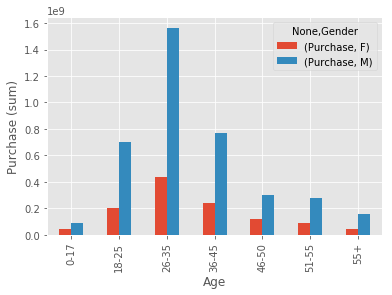

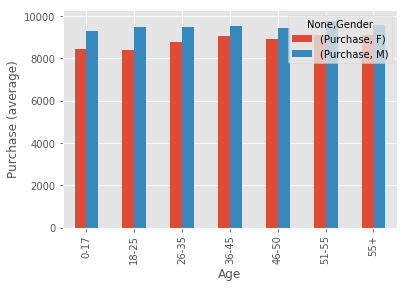

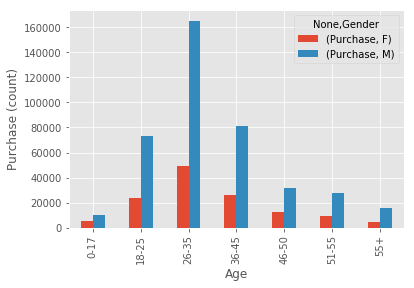

In [12]:
# Your code here

pur_age_gender_sum = data.groupby(['Age', 'Gender']).sum()[['Purchase']]
pur_age_gender_sum.unstack().plot(kind='bar')
plt.ylabel('Purchase (sum)')
plt.show()

pur_age_gender_avg = data.groupby(['Age', 'Gender']).mean()[['Purchase']]
pur_age_gender_avg.unstack().plot(kind='bar')
plt.ylabel('Purchase (average)')
plt.show()

pur_age_gender_count = data.groupby(['Age', 'Gender']).count()[['Purchase']]
pur_age_gender_count.unstack().plot(kind='bar')
plt.ylabel('Purchase (count)')
plt.show()

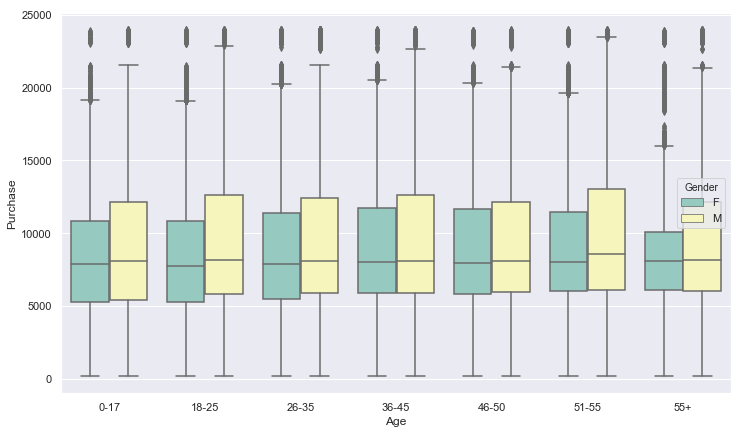

In [13]:
sns.set(rc={'figure.figsize':(12,7)})
ax = sns.boxplot(x='Age', 
                 y='Purchase', 
                 hue="Gender",
                 data=data, 
                 palette="Set3", 
                 order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

In [14]:
pur_user_gender = data.groupby(['User_ID', 'Gender']).count()[['Purchase']].reset_index()
#pur_user_gender.head(10)

user_gender_m = pur_user_gender.loc[pur_user_gender['Gender'] == 'M', ]
f_num_cus = len(pur_user_gender) - len(user_gender_m)
m_num_cus = len(user_gender_m)
print('number of male customers:', m_num_cus)
print('number of female customers:', f_num_cus)

pur_gender_count = pur_user_gender.groupby(['Gender']).sum().reset_index()[['Gender','Purchase']]
f_num_pur = pur_gender_count.loc[pur_gender_count['Gender'] == 'F', 'Purchase'].values[0]
m_num_pur = pur_gender_count.loc[pur_gender_count['Gender'] == 'M', 'Purchase'].values[0]
print('number of male purchases:', m_num_pur)
print('number of female purchase:', f_num_pur)

number of male customers: 4225
number of female customers: 1666
number of male purchases: 405380
number of female purchase: 132197


**How do you interpret this? Please type your answer.**


-average purchase values by age don't differ much <br>
-number of purchases by age varies (26-35 group has the highest number of purchases, followed by 18-25 and 36-45) <br>
-males buy more expensive products compared to females (mostly due to Q3 and Q4) <br>
-more number of male purchases compared to females <br>
-more number of male customers compared to females <br>

### 3. Data Preperation

**(a) Are there any missing values in the dataset?**

In [15]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**(b) Please impute the missing values.**

In [16]:
# Your code here
feature = feature.fillna(0)

**(c) Convert any string values to numeric for the model to interpret the features.**

from email- this is just a standard procedure, doesn't mean you need to treat these features as continuous. 

In [17]:
feature['Product_Category_3'] = feature['Product_Category_3'].astype('category')
feature['Product_Category_2'] = feature['Product_Category_2'].astype('category')
feature['Product_Category_1'] = feature['Product_Category_1'].astype('category')
feature['Occupation'] = feature['Occupation'].astype('category')
feature['Marital_Status'] = feature['Marital_Status'].astype('category')

feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null category
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null category
Product_Category_2            537577 non-null category
Product_Category_3            537577 non-null category
dtypes: category(5), object(4)
memory usage: 19.0+ MB


**(d) Define X and Y matrices for modelling.**

In [18]:
# Your code here
X = feature
Y = data['Purchase']

**(e) Perform one-hot encoding for all the categorical features which are not ordinal.**

In [19]:
# Your code here
X = pd.get_dummies(X, drop_first = True)
X.shape

(537577, 83)

**(f) Split the data into train and test set.**

In [20]:
# Your code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

**(g) Scale the data using StandardScaler in sklearn**

In [21]:
# Your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\v-chlert\AppData\Local\conda\conda\envs\ftk\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\v-chlert\AppData\Local\conda\conda\envs\ftk\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\v-chlert\AppData\Local\conda\conda\envs\ftk\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


### 5. Regression Model

**(a) Perform a Random Forest Regression to predict the purchase using Random Forest**

In [22]:
# Your code here

n_estimators = [25]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

**(b) Perform hyperparameter tuning for max_depth when the optimal value for number of trees(n_estimators) is 25. Also, visualise your cost functions.**

In [23]:
# Your code here
grid = {'n_estimators': n_estimators,
#        'max_features': max_features,
#        'min_samples_split': min_samples_split,
#        'min_samples_leaf': min_samples_leaf,
#        'bootstrap': bootstrap, 
        'max_depth': max_depth}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(estimator = rf, 
                           param_distributions = grid, 
                           cv=3,
                           n_iter = 5,
                           verbose = 2,
                           return_train_score = True,
                           n_jobs = -2,
                           scoring='neg_mean_absolute_error')
rf_cv.fit(X_train, Y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-2)]: Done  15 out of  15 | elapsed: 20.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-2,
          param_distributions={'n_estimators': [25], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=2)

In [24]:
rf_cv.cv_results_

{'mean_fit_time': array([214.02453407, 302.06353172, 173.2244854 , 267.67784866,
        250.65102585]),
 'std_fit_time': array([0.05211628, 0.74856535, 2.30715854, 0.22792803, 0.79482561]),
 'mean_score_time': array([0.97139311, 3.70551689, 1.79115812, 3.44333871, 2.33016388]),
 'std_score_time': array([0.02260254, 0.06661302, 0.28325433, 0.19830827, 0.37660493]),
 'param_n_estimators': masked_array(data=[25, 25, 25, 25, 25],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[20, 40, 10, 110, 80],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 25, 'max_depth': 20},
  {'n_estimators': 25, 'max_depth': 40},
  {'n_estimators': 25, 'max_depth': 10},
  {'n_estimators': 25, 'max_depth': 110},
  {'n_estimators': 25, 'max_depth': 80}],
 'split0_test_score': array([-2222.08813762, -2238.5558984 , -2306.83699441

In [25]:
x = rf_cv.best_params_['max_depth']
print('best max_depth: ', x)
rf_cv.best_estimator_

best max_depth:  20


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

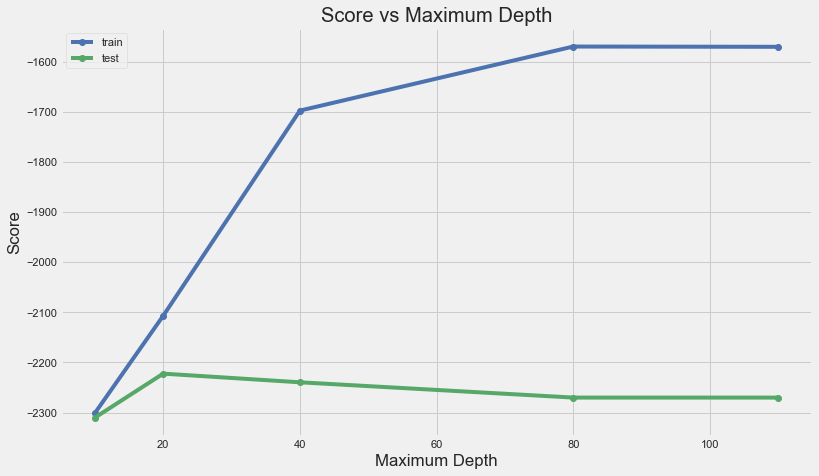

In [50]:
# Your visualisation code here

def visualize_results(model, param = 'max_depth', name = 'Maximum Depth'):
    param_name = 'param_%s' % param

    # Extract cv info
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    param_values = list(model.cv_results_[param_name])
    train_df = pd.DataFrame({'score':train_scores, 'param':param_values}).sort_values('param')
    test_df = pd.DataFrame({'score':test_scores, 'param':param_values}).sort_values('param')
    # Plot the scores 
    plt.plot(train_df['param'], train_df['score'], 'bo-', label = 'train')
    plt.plot(test_df['param'], test_df['score'], 'go-', label = 'test')
    #plt.ylim(ymin = 0, ymax = 1)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Score')
    plt.title('Score vs %s' % name)

    
visualize_results(rf_cv)

Optimal value of maximum depth (max_depth) is:  <br>
Optimal value of number of trees (n_estimators) is: 25

**(c) Train ML Model on optimized hyper parameters.**

In [27]:
# Your code here
rf_opt = RandomForestRegressor(max_depth = 100, 
                               n_estimators = 25,
                               max_features='sqrt',
                               min_samples_leaf = 2,
                               min_samples_split = 10)
rf_opt.fit(X_train, Y_train)
pred = rf_opt.predict(X_test)

**(d) Create a visualization of the feature importances from the estimator above.**

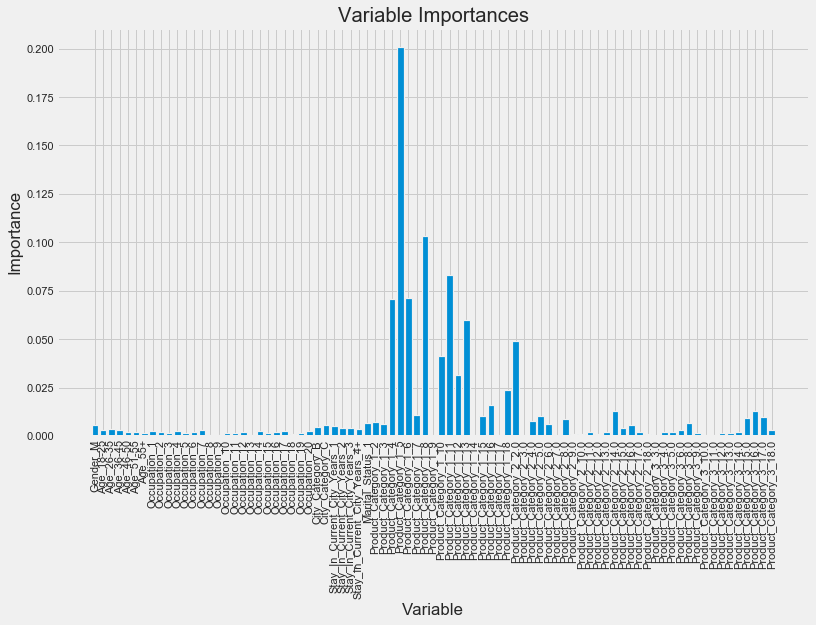

In [28]:
# Your code here

feature_list = list(X.columns)
importances = list(rf_opt.feature_importances_)

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [29]:
result = pd.DataFrame()
result['pred'] = pred
result['actual'] = Y_test.values
result['APE'] = abs(result['pred']-result['actual'])/result['actual']
result.head()
print('MAPE: ', np.mean(result['APE']))

MAPE:  0.3322796090549892


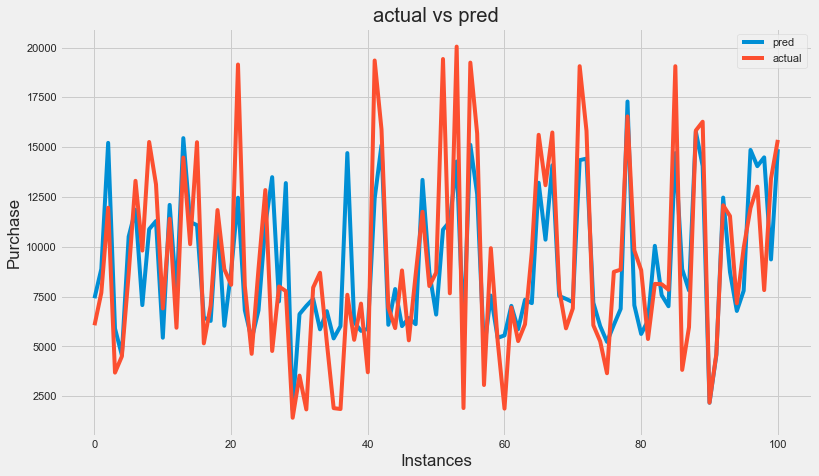

In [30]:
plt.plot(result.loc[0:100, 'pred'], label = 'pred')
plt.plot(result.loc[0:100, 'actual'], label = 'actual')
plt.style.use('fivethirtyeight')
plt.title('actual vs pred')
plt.ylabel('Purchase')
plt.xlabel('Instances')
plt.legend()
plt.show()

**Thank you!**